In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import numpy as np

all_images = []
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/'):
    for filename in filenames:

        all_images.append(os.path.join(dirname, filename))


Did we find the corners True


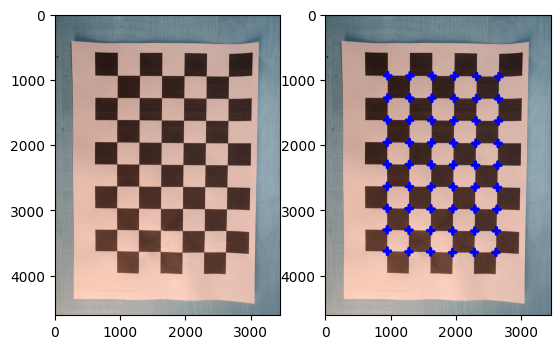

In [6]:
# First we will run the code on 1 image to see if we can find the corners in the image 

img = cv.imread("/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160516.jpg")
plt.subplot(1, 2, 1)
plt.imshow(img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 5)

ret, corners = cv.findChessboardCorners(gray, (6, 9), cv.CALIB_CB_ADAPTIVE_THRESH + cv.CALIB_CB_FAST_CHECK + cv.CALIB_CB_NORMALIZE_IMAGE)

print("Did we find the corners", ret) 
corners2 = cv.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
marker_size = 100
marker_thickness = 50
for corner in corners2:
    x, y = corner.ravel()
    cv.drawMarker(img, (int(x), int(y)), (0, 0, 255), cv.MARKER_CROSS, marker_size, marker_thickness)
plt.subplot(1, 2, 2)
plt.imshow(img)

plt.show()

In [ ]:
#This code is to check if there are some images that dont work. In case the sum of images that dont work is less than 25 we have to take more.
index = 0
for image in all_images:
  print(index)
  index+=1
  print(image)
  img = cv.imread(image)
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  ret, corners = cv.findChessboardCorners(gray, (9, 6), cv.CALIB_CB_ADAPTIVE_THRESH + cv.CALIB_CB_FAST_CHECK + cv.CALIB_CB_NORMALIZE_IMAGE)
  print(ret)

0
/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160741.jpg
True
1
/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160740.jpg
True
2
/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160739.jpg
True
3
/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160737.jpg


/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160741.jpg
/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160740.jpg
/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160739.jpg
/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160737.jpg
/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160733.jpg
/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160728.jpg
/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160726.jpg
/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160716.jpg
/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160714.jpg
/content/drive/MyDrive/Chessboard images/new_chessboard/New chessboard/IMG_20230406_160700.jpg
/content/drive/MyDrive/Chessboard images/new_chess

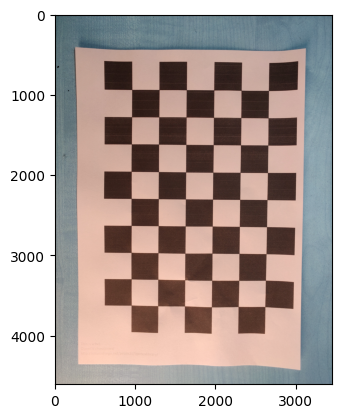

In [7]:
# Now we will do camera calibration on rest of the images
CHECKERBOARD = (9,6)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
objpoints = []
imgpoints = [] 
 
 
# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

for fname in all_images:
    print(fname)
    img = cv.imread(fname)
    plt.imshow(img)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, CHECKERBOARD, cv.CALIB_CB_ADAPTIVE_THRESH + cv.CALIB_CB_FAST_CHECK + cv.CALIB_CB_NORMALIZE_IMAGE)
    
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
      
    imgpoints.append(corners2)

 
h,w = img.shape[:2]
 
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
 
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)


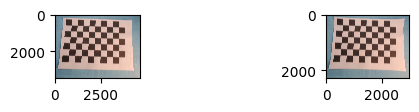

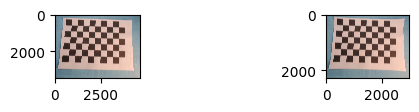

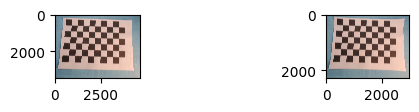

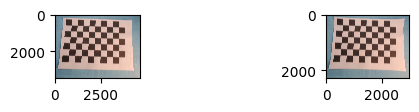

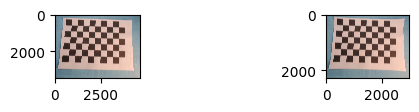

In [8]:
for i in range(5):
  img = cv.imread(all_images[0])
  plt.subplot(5, 2, 2*i + 1)
  plt.imshow(img)
  h,  w = img.shape[:2]
  # print("")
  newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
  # undistort
  dst = cv.undistort(img, mtx, dist, None, newcameramtx)
  # crop the image
  x, y, w, h = roi
  dst = dst[y:y+h, x:x+w]
  plt.subplot(5, 2, 2*i + 2)
  plt.imshow(dst)
  plt.show()

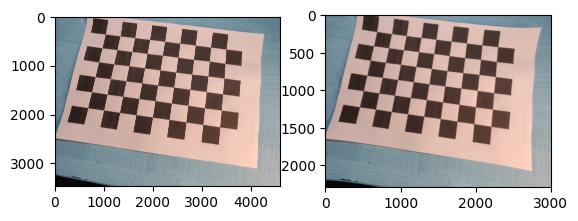

In [9]:
img = cv.imread(all_images[1])
plt.subplot(1, 2, 1)
plt.imshow(img)
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.show()

In [11]:
imgpoints, _ = cv.projectPoints(objp, rvecs[0], tvecs[0], mtx, dist[0])
# imgpoints = np.squeeze(imgpoints)
img = cv.imread(all_images[0])
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, corners = cv.findChessboardCorners(gray, (9, 6), cv.CALIB_CB_ADAPTIVE_THRESH + cv.CALIB_CB_FAST_CHECK + cv.CALIB_CB_NORMALIZE_IMAGE)
# Compute the re-projection error
corners_float = corners.astype(np.float32)
# err = cv2.norm(corners_float, imgpoints, cv2.NORM_L2) / len(corners)
# print(f'Re-projection error: {err}')
print(corners_float.shape, imgpoints.shape)
err = cv.norm(corners_float, imgpoints, cv.NORM_L2) / len(imgpoints)
print(f'Re-projection error: {err}')

(54, 1, 2) (54, 1, 2)
Re-projection error: 0.40966762410979995


Re-projection error for 1 image is : 0.40966762410979995


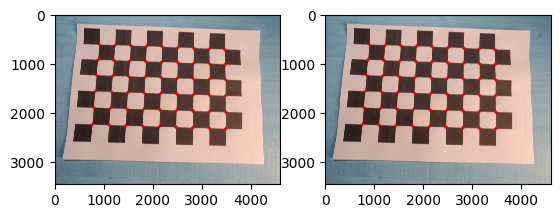

Re-projection error for 2 image is : 0.3657805891285123


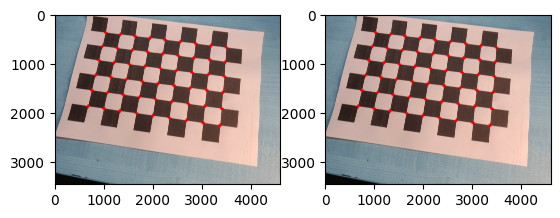

Re-projection error for 3 image is : 0.5095678327732708


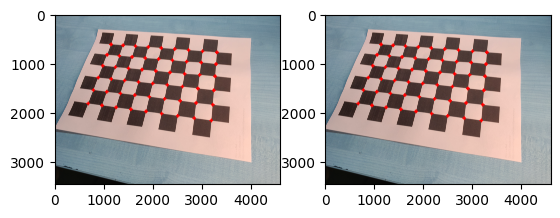

Re-projection error for 4 image is : 0.7298770554725228


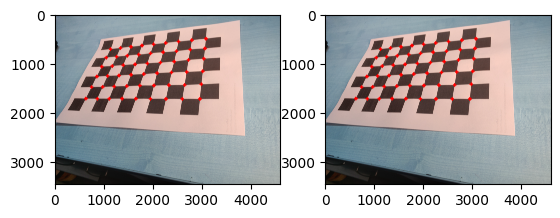

Re-projection error for 5 image is : 0.8183539389047119


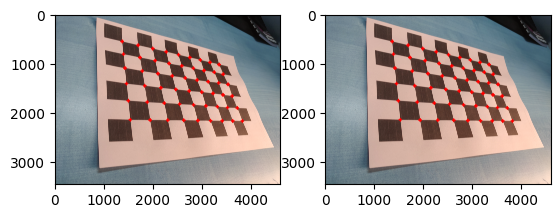

In [12]:
for i in range(5):
  imgpoints, _ = cv.projectPoints(objp, rvecs[i], tvecs[i], mtx, dist[0])
  # imgpoints = np.squeeze(imgpoints)
  img = cv.imread(all_images[i])
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  ret, corners = cv.findChessboardCorners(gray, (9, 6), cv.CALIB_CB_ADAPTIVE_THRESH + cv.CALIB_CB_FAST_CHECK + cv.CALIB_CB_NORMALIZE_IMAGE)
  # Compute the re-projection error
  corners_float = corners.astype(np.float32)
  err = cv.norm(corners_float, imgpoints, cv.NORM_L2) / len(imgpoints)
  print(f'Re-projection error for {i+1} image is : {err}')
  corners2 = cv.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
  img_original = img
  img_projected = img

  marker_size = 50
  marker_thickness = 30
  for corner in corners:
      x, y = corner.ravel()
      cv.drawMarker(img_original, (int(x), int(y)), (255, 0, 0), cv.MARKER_CROSS, marker_size, marker_thickness)
  for corner in corners2:
      x, y = corner.ravel()
      cv.drawMarker(img_projected, (int(x), int(y)), (255, 0, 0), cv.MARKER_CROSS, marker_size, marker_thickness)
  plt.subplot(1, 2, 1)
  plt.imshow(img_original)
  plt.subplot(1, 2, 2)
  plt.imshow(img_projected)

  plt.show()

In [ ]:
error = []
for i in range(25):
  imgpoints, _ = cv.projectPoints(objp, rvecs[i], tvecs[i], mtx, dist[0])
  # imgpoints = np.squeeze(imgpoints)
  img = cv.imread(all_images[i])
  gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  ret, corners = cv.findChessboardCorners(gray, (9, 6), cv.CALIB_CB_ADAPTIVE_THRESH + cv.CALIB_CB_FAST_CHECK + cv.CALIB_CB_NORMALIZE_IMAGE)
  # Compute the re-projection error
  corners_float = corners.astype(np.float32)
  err = cv.norm(corners_float, imgpoints, cv.NORM_L2) / len(imgpoints)
  error.append(err)

In [ ]:
print(error)
plt.bar(error)

In [ ]:
np.std(error)

In [47]:
for i in range(5):
  rotation_matrix = cv.Rodrigues(rvecs[i])[0]
  extrinsic_matrix = np.zeros((4,4))
  extrinsic_matrix[:3, :3] = rotation_matrix
  extrinsic_matrix[3, :3] = tvecs[i].reshape(3)
  extrinsic_matrix[3][3] = 1

  normal_matrix = np.linalg.inv(extrinsic_matrix).T
  camera_normal = np.dot(normal_matrix, np.array([0,0,1,1]).reshape(4,1))
  print(f"The camera normals for {i + 1}th image are: \n  {(camera_normal / cv.norm(camera_normal))[:3]}")

The camera normals for 1th image are: 
  [[ 0.33806276]
 [ 0.21505585]
 [-0.9122757 ]]
The camera normals for 2th image are: 
  [[ 0.22066743]
 [ 0.23903604]
 [-0.94221577]]
The camera normals for 3th image are: 
  [[ 0.11168634]
 [-0.03047521]
 [-0.99078929]]
The camera normals for 4th image are: 
  [[-0.05265201]
 [-0.22134292]
 [-0.97165988]]
The camera normals for 5th image are: 
  [[ 0.672322  ]
 [-0.10791926]
 [-0.72623813]]
